In [1]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import random as r
from timeit import default_timer as timer
import pandas as pd
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data',delimiter=",", header=None)
data = data.copy()
data.columns = ['ID', ' radius','texture', 'perimeter','area ','smoothness','compactness','concavity','concave points','symmetry ','fractal dimension']
data.head() # Preview Data

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


,ID,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal dimension
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


## Model training

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                   699 non-null int64
 radius              699 non-null int64
texture              699 non-null int64
perimeter            699 non-null int64
area                 699 non-null int64
smoothness           699 non-null int64
compactness          699 non-null object
concavity            699 non-null int64
concave points       699 non-null int64
symmetry             699 non-null int64
fractal dimension    699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [0]:
cancer = '/content/drive/My Drive/Colab Notebooks/nt_toolbox/data/breast-cancer-wisconsin.dat'
data=np.loadtxt(cancer, delimiter=',', unpack=True)

### Subgradient descent method

In [0]:
#Converting the data to X and Y
A=np.transpose(data[1:-1])[0:500]
#print(A)
(n,m)=A.shape
Y=np.transpose(data[-1][0:500]-3*np.ones(n))
#print(A.shape)
T=[[0 for x in range(m+1)] for y in range(n)]
X=np.array(T)
#print(X.shape)
#print(X[1][:].shape)
for i in range(n):
    for j in range(m):
        X[i][j]=A[i][j]
for i in range(n):
    X[i][m]=1
#print(X)

In [0]:
#Choosing a subgradient
def subdiff(w,matrix,u,col):
    (n,m)= matrix.shape
    v=0.00000001*w
    for i in range(n):
        c = col[i]*np.matmul(np.transpose(w),matrix[i][:])
        if (1-c)<0:
            u=np.zeros(m)
        elif (1-c)>0:
            u=-col[i]*np.transpose(matrix[i][:])
        else:
            u=-r.randrange(-1,1)*col[i]*np.transpose(matrix[i][:])
        v +=1/n*u
    return v

In [0]:
def fvalue(matrix,col,w):
    (n,m)=matrix.shape
    v=0.00000001/2*np.linalg.norm(w,ord=2)**2
    for i in range(n):
        v += 1/n*max(0, 1-col[i]*np.matmul(np.transpose(w),matrix[i][:]))
    return v

In [0]:
## Subgradient descent method
def regress(matrix,col):
    (n,m)= matrix.shape
    u = [1 for i in range (m)]
    w = np.ones(m)
    fbest=100*np.ones(10001)
    a=np.ones(m)
    value=np.ones(10000)
    for i in range(10000):
        v=subdiff(w,matrix,u,col) #choose a subgradient
        w += -1/np.sqrt(i+1)*v# x^{k+1}=x^k-f(x^k)/(norm(v)^2)*v
        value[i]=fvalue(X,Y,w) #compute f(x^{k+1})
        if value[i]<fbest[i]:#store fbest
            fbest[i+1]=value[i]
            a+=-a+w
        else:
            fbest[i+1]=fbest[i]
    return (a, w, value, fbest)

time= 54.506972975999815
value= [ 1.63062817 11.67839187  5.41562166 ...  0.08512043  0.08511184
  0.08509002]
fbest= [1.00000000e+02 1.63062817e+00 1.63062817e+00 ... 8.50817392e-02
 8.50817392e-02 8.50817392e-02]


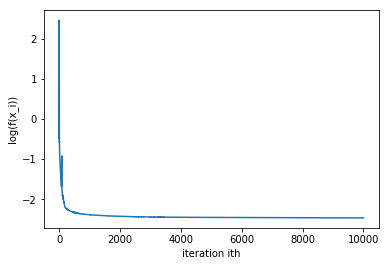

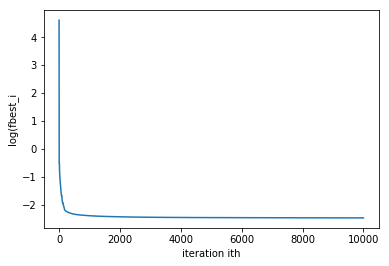

In [8]:
start = timer()
(wbest,gdm,value, fbest)=regress(X,Y)
end = timer()
print('time=',end - start)
#print('x=',x)
print('value=',value)
print('fbest=',fbest)
import matplotlib.pyplot as plt
plt.plot(np.log(value))
plt.xlabel('iteration ith')
plt.ylabel('log(f(x_i))')
plt.show()
plt.plot(np.log(fbest))
plt.xlabel('iteration ith')
plt.ylabel('log(fbest_i')
plt.show()

### Stochastic subgradient descent method

In [0]:
def subdiffsto(w,matrix,col):
    (n,m)=X.shape
    c = col*np.matmul(np.transpose(w),matrix)
    if (1-c)<0:
        u=np.zeros(m)
    elif (1-c)>0:
        u=-col*np.transpose(matrix)
    else:
        u=-r.randrange(-1,1)*col*np.transpose(matrix)
    v =u+0.00000001*w
    return v

In [0]:
##Stochastic subgradient descent method
def storegress(matrix,col):
    (n,m)= matrix.shape
    w=np.ones(m)
    fbest=100*np.ones(100001)
    a=np.ones(m)
    value=np.ones(100000)
    for i in range(100000):
        j=r.randint(0,n-1) #choose randomly j in [0,n-1]
        v=subdiffsto(w,matrix[j][:],col[j]) #choose a subgradient of |a_j'x-b_j|
        w += -1/np.sqrt(i+1)*v #x^{k+1}=x^k-1/(norm(v)*sqrt(i+1))*v
        value[i]=fvalue(X,Y,w)#compute f(x^{k+1})
        if value[i]<fbest[i]:#store fbest
            fbest[i+1]=value[i]
            a=-a+w
        else:
            fbest[i+1]=fbest[i]
    return (a, w, value, fbest)


time= 197.88739858999998
value= [15.93800027 15.93800016 21.50658288 ...  0.09149504  0.09149504
  0.09149504]
fbest= [1.00000000e+02 1.59380003e+01 1.59380002e+01 ... 9.08569267e-02
 9.08569267e-02 9.08569267e-02]


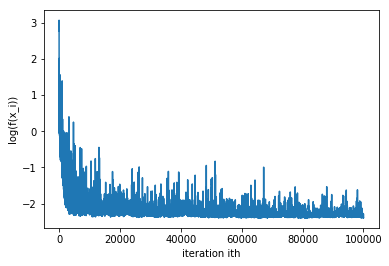

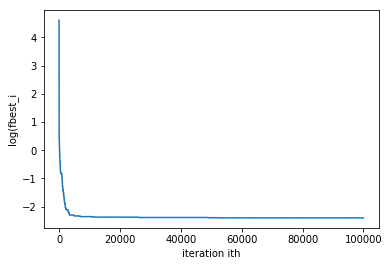

In [11]:
start = timer()
(wstobest,stogdm,value, fbest)=storegress(X,Y)
end = timer()
print('time=',end - start)
#print('x=',x)
print('value=',value)
print('fbest=',fbest)
import matplotlib.pyplot as plt
plt.plot(np.log(value))
plt.xlabel('iteration ith')
plt.ylabel('log(f(x_i))')
plt.show()
plt.plot(np.log(fbest))
plt.xlabel('iteration ith')
plt.ylabel('log(fbest_i')
plt.show()

## Model testing

In [12]:
B=np.transpose(data[1:-1])[500:-1]
(n,m)=B.shape
print(B.shape)
C=np.transpose(data[-1])[500:-1]
Test=[[0 for x in range(m+1)] for y in range(n)]
Xtest=np.array(Test)
for i in range(n):
    for j in range(m):
        Xtest[i][j]=B[i][j]
for i in range(n):
    Xtest[i][m]=1
#prettyP(Xtest)

(182, 9)


In [13]:
y1=np.matmul(Xtest,gdm)
y2=np.matmul(Xtest,stogdm)
for i in range(n):
    if y1[i]>0:
        y1[i]=4
    else:
        y1[i]=2
for i in range(n):
    if y2[i]>0:
        y2[i]=4
    else:
        y2[i]=2
print(y1)
print(y2)
count1=0
for i in range(n):
    if y1[i]==C[i]:
        count1+=1
eff1=count1/n
count2=0
for i in range(n):
    if y2[i]==C[i]:
        count2+=1
eff2=count2/n
print('efficiency1=',eff1)
print('efficiency2=',eff2)

[4. 2. 2. 2. 4. 2. 2. 4. 4. 2. 2. 2. 2. 2. 2. 4. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 4. 2. 2. 4. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 4. 2. 2. 4. 4. 4. 4. 2. 2. 4. 2. 2. 2. 2. 2. 2. 4. 4. 2. 2. 2. 4.
 2. 4. 2. 4. 4. 4. 2. 4. 2. 2. 2. 2. 2. 2. 2. 2. 4. 4. 4. 2. 2. 4. 2. 4.
 4. 4. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 4. 2. 2. 2. 2. 2. 2. 4. 2. 2.
 4. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 4. 2. 2. 2. 2. 2. 2. 2. 2. 4. 4. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 4. 4. 4. 2. 2. 2. 2. 2. 2. 2. 2. 2. 4. 4. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 4. 2. 2. 2. 2. 4. 4.]
[4. 2. 2. 2. 4. 2. 2. 4. 4. 2. 2. 2. 2. 2. 2. 4. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 4. 2. 2. 4. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 4. 2. 2. 4. 4. 4. 4. 2. 2. 4. 2. 2. 2. 2. 2. 2. 4. 4. 2. 2. 2. 4.
 2. 4. 2. 4. 4. 4. 2. 4. 2. 2. 2. 2. 2. 2. 2. 2. 4. 4. 4. 2. 2. 4. 2. 4.
 4. 4. 2. 2. 2. 2. 2. 2. 2. 4. 2. 2. 2. 2. 4. 2. 2. 2. 2. 2. 2. 4. 2. 2.
 4. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 4. 2. 2. 2. 2. 2. 2. 2. 2. 2. 4. 2.
 2. 2. 